# ARIMA analysis - Collision Prediction

In [29]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
from xml.etree import ElementTree as ET
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [31]:
dataset_fcd = pd.read_csv("dataset_fcd_col_2.csv") # simulation data can generated using the Dataset for classification.ipynb in simulation_dataset folder  
dataset_fcd[dataset_fcd['id']=="ego_vehicle"].describe()

,time,x,y,angle,speed,pos,slope,signals,acceleration,distance,CO2,CO,HC,NOx,PMx,fuel,electricity,noise,waiting,collision_occurred
count,514.000000,514.000000,514.000000,514.000000,514.00000,514.000000,514.0,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.0,514.000000,514.000000,514.000000
mean,26.150000,89.493696,1.304377,266.117082,4.84572,38.500292,0.0,3.852140,0.000214,43.561479,2764.587938,90.964008,0.478658,1.199805,0.057821,881.796459,0.0,59.937082,0.555058,0.001946
std,14.852329,74.851041,1.783151,13.461936,3.44530,27.097132,0.0,4.299862,2.593278,24.421192,2955.112810,73.971020,0.395674,1.321743,0.067639,942.536119,0.0,8.240868,1.577246,0.044108
min,0.500000,-0.900000,-5.470000,211.200000,0.00000,0.020000,0.0,0.000000,-11.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,23.340000,0.000000,0.000000
25%,13.325000,10.750000,1.600000,270.000000,2.53000,12.957500,0.0,0.000000,-0.400000,27.177500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,55.940000,0.000000,0.000000
50%,26.150000,81.880000,1.600000,270.000000,4.80000,39.250000,0.0,2.000000,0.000000,39.250000,2624.720000,91.215000,0.480000,1.105000,0.040000,837.220000,0.0,58.405000,0.000000,0.000000
75%,38.975000,141.632500,1.600000,270.000000,6.82000,56.567500,0.0,8.000000,0.637500,56.567500,2927.417500,164.780000,0.810000,1.217500,0.070000,933.742500,0.0,61.560000,0.000000,0.000000
max,51.800000,244.900000,4.800000,270.000000,12.62000,99.780000,0.0,10.000000,6.550000,99.780000,15010.660000,303.100000,1.740000,6.750000,0.350000,4787.640000,0.0,87.180000,7.500000,1.000000


In [32]:
dataset_fcd_val = pd.read_csv("dataset_fcd_col_3.csv") # simulation data can generated using the Dataset for classification.ipynb in simulation_dataset folder
dataset_fcd_val[dataset_fcd_val['id']=="ego_vehicle"].describe()

,time,x,y,angle,speed,pos,slope,signals,acceleration,distance,CO2,CO,HC,NOx,PMx,fuel,electricity,noise,waiting,collision_occurred
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.0,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.0,516.000000,516.000000,516.000000
mean,26.250000,78.856337,1.054729,264.554012,4.908275,38.705097,0.0,4.197674,-0.000368,44.015736,3196.808120,102.658798,0.542500,1.399709,0.069322,1019.653682,0.0,60.398760,0.776744,0.001938
std,14.910064,72.306552,2.729099,18.717020,4.368936,28.120760,0.0,4.304849,2.912011,25.805276,4298.794073,90.417569,0.504402,1.948461,0.102600,1371.093815,0.0,9.357373,2.008903,0.044023
min,0.500000,-1.490000,-9.630000,190.270000,0.000000,0.060000,0.0,0.000000,-11.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,21.460000,0.000000,0.000000
25%,13.375000,10.680000,1.600000,270.000000,0.980000,13.560000,0.0,0.000000,-0.407500,26.195000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,55.940000,0.000000,0.000000
50%,26.250000,63.875000,1.600000,270.000000,4.570000,39.320000,0.0,2.000000,0.000000,39.320000,2624.720000,94.580000,0.500000,1.170000,0.050000,837.220000,0.0,58.185000,0.000000,0.000000
75%,39.125000,129.060000,1.600000,270.000000,5.970000,56.697500,0.0,8.000000,0.652500,58.170000,2935.117500,164.780000,0.810000,1.250000,0.070000,936.207500,0.0,62.407500,0.000000,0.000000
max,52.000000,244.900000,4.800000,270.000000,18.790000,99.880000,0.0,10.000000,7.770000,99.880000,35835.040000,667.220000,3.920000,16.420000,0.880000,11429.510000,0.0,95.380000,8.900000,1.000000


In [33]:
dataset_fcd_test = pd.read_csv("dataset_fcd_col_4.csv") # simulation data can generated using the Dataset for classification.ipynb in simulation_dataset folder
dataset_fcd_test[dataset_fcd_test['id']=="ego_vehicle"].describe()

,time,x,y,angle,speed,pos,slope,signals,acceleration,distance,CO2,CO,HC,NOx,PMx,fuel,electricity,noise,waiting,collision_occurred
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.0,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.0,509.000000,509.000000,509.000000
mean,25.900000,73.663536,1.503202,266.987623,4.855088,37.219548,0.0,4.726916,0.000196,42.067525,3014.286306,100.886699,0.529843,1.313969,0.064971,961.439921,0.0,59.949136,1.547741,0.001965
std,14.707991,75.684746,1.520617,10.546997,4.277165,25.672363,0.0,4.425908,2.460633,23.028977,3494.659617,80.767421,0.436234,1.568771,0.081655,1114.618481,0.0,8.310484,3.251132,0.044324
min,0.500000,-0.010000,-3.750000,223.600000,0.000000,0.010000,0.0,0.000000,-10.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,23.240000,0.000000,0.000000
25%,13.200000,10.950000,1.600000,270.000000,0.000000,15.000000,0.0,0.000000,-0.280000,28.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,55.940000,0.000000,0.000000
50%,25.900000,43.130000,1.600000,270.000000,5.320000,39.050000,0.0,2.000000,0.000000,39.050000,2624.720000,95.510000,0.510000,1.200000,0.070000,837.220000,0.0,57.910000,0.000000,0.000000
75%,38.600000,121.820000,1.600000,270.000000,6.930000,47.000000,0.0,10.000000,0.780000,52.020000,3309.470000,164.780000,0.810000,1.360000,0.070000,1055.590000,0.0,62.960000,0.000000,0.000000
max,51.300000,244.900000,4.800000,270.000000,17.550000,99.820000,0.0,10.000000,6.000000,99.820000,27945.050000,507.340000,3.000000,12.720000,0.680000,8913.020000,0.0,88.620000,12.500000,1.000000


In [34]:
dataset_fcd = dataset_fcd.drop(['slope','electricity','route','eclass','CO','CO2','HC','NOx', 'PMx','fuel','angle','noise','signals','waiting','InvolvedParties','collision_type'],axis=1) # removing unnecessary variables
dataset_fcd_val = dataset_fcd_val.drop(['slope','electricity','route','eclass','CO','CO2','HC','NOx', 'PMx','fuel','angle','noise','signals','waiting','InvolvedParties','collision_type'],axis=1) # removing unnecessary variables
dataset_fcd_test = dataset_fcd_test.drop(['slope','electricity','route','eclass','CO','CO2','HC','NOx', 'PMx','fuel','angle','noise','signals','waiting','InvolvedParties','collision_type'],axis=1) # removing unnecessary variables

In [15]:
def dataset_transformer(dataset):
    ego_df = dataset[dataset['id']=="ego_vehicle"]
    ego_data = ego_df[ego_df['time'] <= round(float(ego_df[ego_df['collision_occurred'] ==1]['time']+0.5),1)]
    ego_vehicle_id = 'ego_vehicle'
    non_ego_data = dataset[dataset['id'] != ego_vehicle_id]
    non_ego_vehicle_ids = non_ego_data['id'].unique()

    transformed_data = []

    for time in ego_data['time'].unique():
        ego_vehicle_data = ego_data[ego_data['time'] == time]

        time_frame_data = {
            'time': time,
            'ego_id': ego_vehicle_id,
            'ego_speed': ego_vehicle_data['speed'].values[0],
            'ego_acceleration': ego_vehicle_data['acceleration'].values[0],
            'ego_x': ego_vehicle_data['x'].values[0],
            'ego_y': ego_vehicle_data['y'].values[0]
        }

        for non_ego_id in non_ego_vehicle_ids:
            non_ego_vehicle_data = non_ego_data[(non_ego_data['id'] == non_ego_id) & (non_ego_data['time'] == time)]

            if not non_ego_vehicle_data.empty:
                relative_speed = non_ego_vehicle_data['speed'].values[0] - time_frame_data['ego_speed']
                relative_acceleration = non_ego_vehicle_data['acceleration'].values[0] - time_frame_data['ego_acceleration']
                relative_displacement = ((non_ego_vehicle_data['x'].values[0] - time_frame_data['ego_x'])**2 + 
                                         (non_ego_vehicle_data['y'].values[0] - time_frame_data['ego_y'])**2)**0.5
                vehicle_presence = 1
            else:
                relative_speed = relative_acceleration = relative_displacement = vehicle_presence = 0

            time_frame_data[f'{non_ego_id}_relative_speed'] = relative_speed
            time_frame_data[f'{non_ego_id}_relative_acceleration'] = relative_acceleration
            time_frame_data[f'{non_ego_id}_relative_displacement'] = relative_displacement
            time_frame_data[f'{non_ego_id}_presence'] = vehicle_presence

        time_frame_data['collision_occurred']= ego_vehicle_data['collision_occurred'].values[0]

        transformed_data.append(time_frame_data)

    transformed_df = pd.DataFrame(transformed_data)
    return transformed_df

train_df = dataset_transformer(dataset_fcd)
val_df = dataset_transformer(dataset_fcd_val)
test_df = dataset_transformer(dataset_fcd_test)

In [38]:
window_size = 6
train_df['collision_label'] = train_df['collision_occurred'].rolling(window=window_size, min_periods=1).max().astype(int)
val_df['collision_label'] = val_df['collision_occurred'].rolling(window=window_size, min_periods=1).max().astype(int)
test_df['collision_label'] = test_df['collision_occurred'].rolling(window=window_size, min_periods=1).max().astype(int)

In [39]:
train_df.to_csv("train_set.csv",index=False)

In [40]:
train_df =pd.read_csv("train_set.csv")
train_df = train_df[train_df['time'] <= 49.1]
train_df

,time,ego_id,ego_speed,ego_acceleration,ego_x,ego_y,nearest_vehicle_id,nearest_vehicle_relative_speed,nearest_vehicle_relative_acceleration,nearest_vehicle_relative_displacement,collision_occurred,collision_label
0,0.5,ego_vehicle,0.00,0.00,244.90,4.80,non_ego_flow.0,0.29,1.21,312.256529,0,0
1,0.6,ego_vehicle,0.03,0.34,244.90,4.80,non_ego_flow.0,0.43,1.30,312.224564,0,0
2,0.7,ego_vehicle,0.10,0.64,244.89,4.80,non_ego_flow.0,0.56,1.36,312.178521,0,0
3,0.8,ego_vehicle,0.21,1.12,244.87,4.80,non_ego_flow.0,0.67,1.13,312.105621,0,0
4,0.9,ego_vehicle,0.40,1.86,244.83,4.80,non_ego_flow.0,0.72,0.55,312.004567,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
482,48.7,ego_vehicle,5.27,0.75,1.30,-1.56,non_ego_flow.4,1.48,0.95,3.663564,0,0
483,48.8,ego_vehicle,5.33,0.56,1.03,-2.02,non_ego_flow.4,1.59,1.17,2.879392,0,0
484,48.9,ego_vehicle,5.34,0.11,0.75,-2.48,non_ego_flow.4,1.78,1.88,2.332381,0,0
485,49.0,ego_vehicle,5.38,0.41,0.48,-2.94,non_ego_flow.4,1.92,1.43,2.235442,0,0


### ARIMA Model - Univariate considering Ego-vehicle acceleration

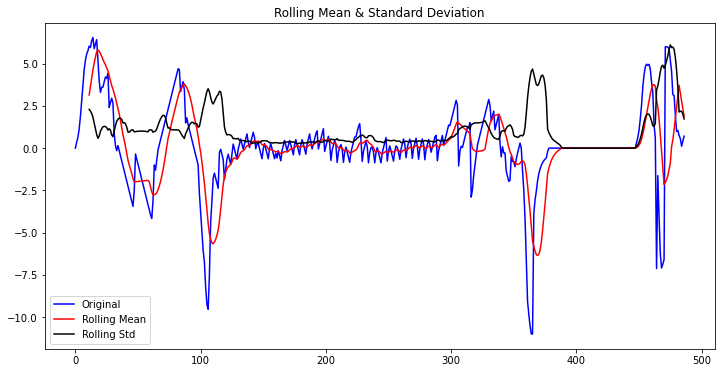

Results of Dickey-Fuller Test:


Test Statistic                  -4.793910
p-value                          0.000056
#Lags Used                      10.000000
Number of Observations Used    476.000000
Critical Value (1%)             -3.444163
Critical Value (5%)             -2.867631
Critical Value (10%)            -2.570014
dtype: float64

In [110]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def test_stationarity(timeseries):
    # rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey-Fuller test:
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# Testing stationarity of 'ego_acceleration'
stationarity_test_results = test_stationarity(train_df['ego_acceleration'])
stationarity_test_results

In [111]:
from pmdarima import auto_arima

# optimal ARIMA parameters
auto_arima_model = auto_arima(train_df['ego_acceleration'], start_p=1, start_q=1,
                              test='adf',       # adftest for optimal 'd'
                              max_p=3, max_q=3, 
                              m=1,              # frequency of series
                              d=None,           # let model determine 'd'
                              seasonal=False,   # No Seasonality
                              start_P=0, 
                              D=0, 
                              trace=True,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)

print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1384.934, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2256.997, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1386.294, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1851.124, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1376.996, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1384.016, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1377.259, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1377.251, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1380.052, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1378.275, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1375.793, Time=0.42 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1379.279, Time=0.85 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1379.243, Time=0.55 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1377.697, Time=0.55 sec

Best model:  ARIMA(3,0,2)(0,0,0)

In [112]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 3, 0, 2

arima_model = ARIMA(train_df['ego_acceleration'], order=(p, d, q))
arima_model_fit = arima_model.fit()
model_summary = arima_model_fit.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       ego_acceleration   No. Observations:                  487
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -681.849
Date:                Thu, 30 Nov 2023   AIC                           1377.697
Time:                        11:26:19   BIC                           1407.015
Sample:                             0   HQIC                          1389.215
                                - 487                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1094      0.549      0.199      0.842      -0.966       1.185
ar.L1          0.7300      0.132      5.523      0.000       0.471       0.989
ar.L2          0.8270      0.181      4.569      0.000       0.472       1.182
ar.L3         -0.6450      0.157     -4.121      0.000      -0.952      -0.338
ma.L1          0.2572      0.140      1.833      0.067      -0.018       0.532
ma.L2         -0.5502      0.187     -2.942      0.003      -0.917      -0.184
sigma2         0.9592      0.029     33.180      0.000       0.903       1.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             51622.15
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               4.05   Skew:                             2.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        53.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
next_timestamp_prediction = arima_model_fit.forecast(steps=1)
next_timestamp_prediction

487    0.775813
dtype: float64